# Практика по определению моделей в Keras

В каждом из заданий ниже, реализуйте модель, повторяющую структуру модели на приложенной картинке. При определении моделей, можете использовать как Sequential так и Functional API.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np


## Задание 1

Реализуйте модель описанную ниже. Активацию последнего слоя сделайте "softmax".

<img src="https://sun9-48.userapi.com/c855232/v855232648/231993/Vu6KLs8Wuq0.jpg" width=200>
<img src="https://sun9-31.userapi.com/c855232/v855232648/23199c/OFRyfEXK1rs.jpg" width=400>


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


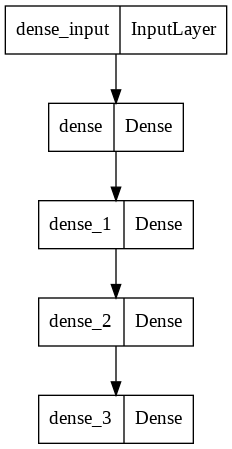

In [ ]:
# <YOUR CODE STARTS HERE >
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(10,)))
model.add(Dense(8))
model.add(Dense(16))
model.add(Dense(3, activation="softmax"))
# <YOUR CODE ENDS HERE >
model.summary()
tf.keras.utils.plot_model(model, show_shapes=False)

In [ ]:
output = model(np.ones((3, 10)))
assert np.allclose(output.numpy().sum(1),  np.ones(3)), "Did you forget softmax in the last layer?"
assert model.count_params() == 279, "Wrong params number"
print("Simple tests passed")

Simple tests passed


## Задание 2

Реализуйте модель описанную ниже.

<img src="https://sun9-47.userapi.com/c855232/v855232648/2319c3/m03OIBp5Jas.jpg" width=300>


*Кстати, такая кострукция не лишена смысла -- в следующем модуле мы увидим как она помогла совершить прорыв в классификации изображений. Она носит название residual block*


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['Input[0][0]']                  
                                                                                                  
 add (Add)                      (None, 10)           0           ['Input[0][0]',                  
                                                                  'Layer1[0][0]']                 
                                                                                                  
Total params: 110
Trainable params: 110
Non-trainable params: 0
______________________________

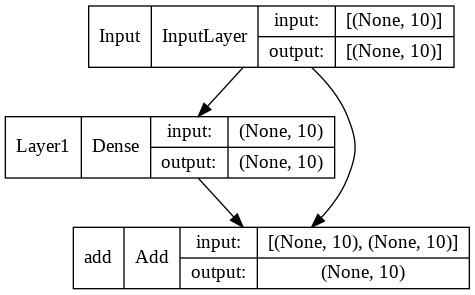

In [ ]:
# <YOUR CODE STARTS HERE >
input_layer = tf.keras.layers.Input(shape=(10, ), name="Input")

l1_output = Dense(10, name="Layer1")(input_layer)
output = tf.keras.layers.Add()([input_layer, l1_output])

model = tf.keras.Model(inputs=input_layer, outputs=output)
# <YOUR CODE ENDS HERE >
model.summary()
assert model.count_params() == 110, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=True)

## Задание 3

Реализуйте модель описанную ниже. Вам пригодится tf.keras.layers.Concatenate.

<img src="https://sun9-36.userapi.com/c855232/v855232648/2319cc/yIs96FbaAGo.jpg" width=450>
<img src="https://sun9-2.userapi.com/c855232/v855232648/2319d5/nqtzfrTiwo4.jpg" width=400>


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['Input[0][0]']                  
                                                                                                  
 Layer2 (Dense)                 (None, 10)           110         ['Input[0][0]']                  
                                                                                                  
 Layer3 (Dense)                 (None, 10)           110         ['Layer1[0][0]']                 
                                                                                            

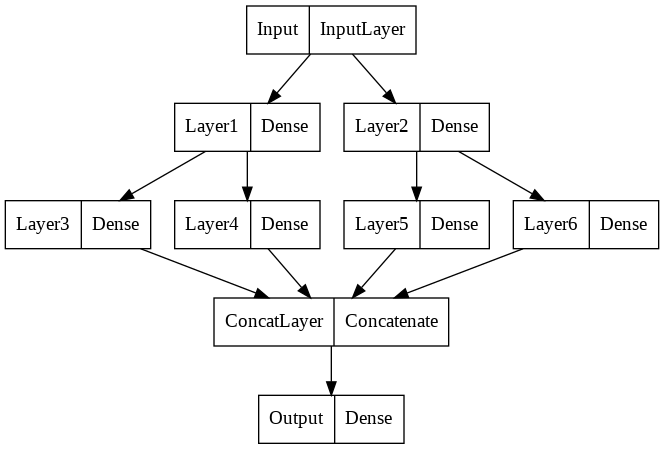

In [ ]:
# <YOUR CODE STARTS HERE >
input_layer = tf.keras.layers.Input(shape=(10, ), name="Input")
dense_layer = Dense(10)

l1_output = Dense(10, name="Layer1")(input_layer)
l2_output = Dense(10, name="Layer2")(input_layer)

l3_output = Dense(10, name="Layer3")(l1_output)
l4_output = Dense(10, name="Layer4")(l1_output)

l5_output = Dense(10, name="Layer5")(l2_output)
l6_output = Dense(10, name="Layer6")(l2_output)

l7_output = tf.keras.layers.Concatenate(name="ConcatLayer")([l3_output, l4_output, l5_output, l6_output])

l8_output = Dense(3, name="Output")(l7_output)

model = tf.keras.Model(inputs=input_layer, outputs=l8_output)
# <YOUR CODE ENDS HERE >

model.summary()
assert model.count_params() == 783, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=False)